In [1]:
library(deSolve)
library(reshape2)
library(ggplot2)

Warning message:
"package 'deSolve' was built under R version 3.6.3"Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [2]:
initial_number_susceptibles <- 999999
initial_number_infected <- 1
initial_number_recovered <- 0
cont_forceof_infection <- 0.2
recovery_rate <- 0.1
follow_up_duration <- 60

In [4]:
initial_state_values <- c(S = initial_number_susceptibles, I = initial_number_infected, R = initial_number_recovered) 
parameters <- c(gamma = recovery_rate, lambda = cont_forceof_infection)
times <- seq(from = 0, to = follow_up_duration, by=1)


In [5]:
initial_state_values
parameters
times

S      I      R 
999999      1      0

gamma lambda 
   0.1    0.2

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50 51 52 53 54 55 56 57 58 59 60

In [6]:
sir_model <- function(time, state, parameters){
    with(as.list(c(state, parameters)), {
        dS <- -lambda*S
        dI <- lambda*S-gamma*I
        dR <- gamma*I
        return(list(c(dS, dI, dR)))
    })
}

In [8]:
library(deSolve)
library(reshape2)
library(ggplot2)

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

In [9]:
output

time,S,I,R
0,999999.000,1.0,0.000
1,818729.935,172214.1,9056.004
2,670319.375,296821.9,32858.688
3,548811.086,384013.5,67175.386
4,449328.506,441982.4,108689.084
5,367879.052,477302.6,154818.340
6,301193.883,495235.0,203571.160
7,246596.683,499976.7,253426.573
8,201896.281,494864.9,303238.803
9,165298.685,482541.5,352159.774


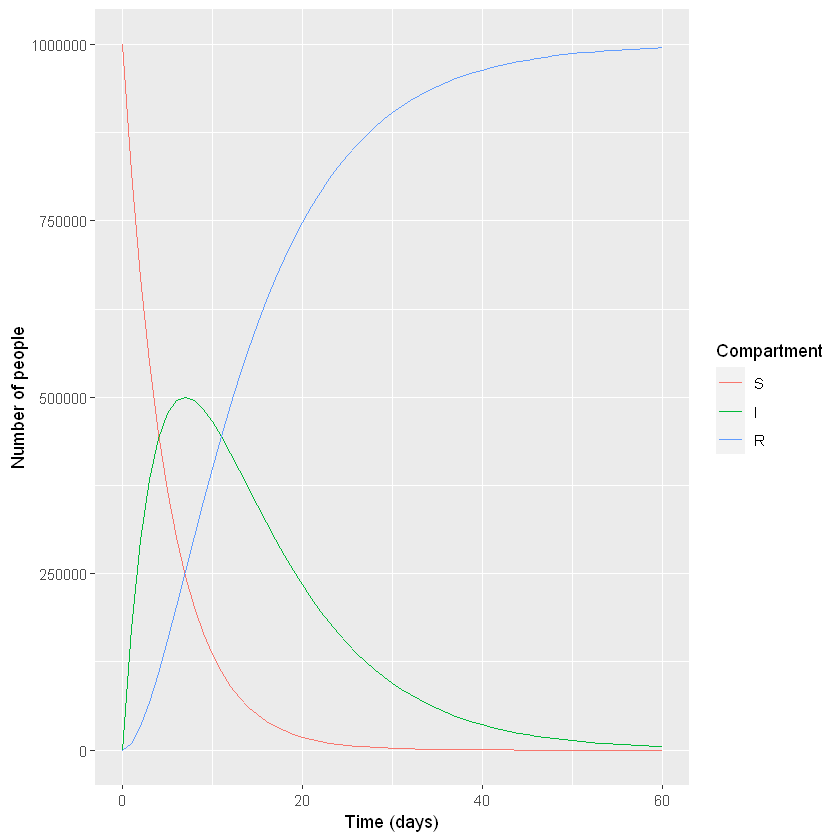

In [10]:
output_long <- melt(as.data.frame(output), id = 'time')

ggplot(data = output_long,
      aes(x = time, y = value, colour = variable, group = variable))+
geom_line()+
xlab("Time (days)")+
ylab("Number of people")+
labs(colour = "Compartment")